New York City Taxi Data with Time Series
========================================

We read NYC Taxi data from Google Cloud Storage using the parquet format.

### Connect to a cluster on Google Container Engine

In [1]:
from dask.distributed import Client, progress
c = Client('dask-scheduler:8786')
c

Client Scheduler: tcp://dask-scheduler:8786 Dashboard: http://dask-scheduler:8787,Cluster Workers: 40 Cores: 80 Memory: 270.95 GB


### Load Parquet Data

In [2]:
import gcsfs
import dask.dataframe as dd

df = dd.read_parquet('gcs://anaconda-public-data/nyc-taxi/nyc.parquet',
                     storage_options={'token': 'cloud'}).persist()
progress(df)

VBox()

In [3]:
%time df.passenger_count.sum().compute()

CPU times: user 48 ms, sys: 9 ms, total: 57 ms
Wall time: 398 ms


245566747

In [4]:
%time df.groupby(df.passenger_count).size().compute().sort_index()

CPU times: user 42 ms, sys: 2 ms, total: 44 ms
Wall time: 637 ms


passenger_count
0        40853
1    102991045
2     20901372
3      6135107
4      2981071
5      7939001
6      5123951
7          239
8          181
9          169
dtype: int64

In [5]:
%time df.head()  # Fast roundtrip access. Faster than video frame-rate

CPU times: user 6 ms, sys: 1 ms, total: 7 ms
Wall time: 21.8 ms


,VendorID,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
tpep_pickup_datetime,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,1,2015-01-01 00:11:26,5,4.00,-73.971436,40.760201,1,N,-73.921181,40.768269,2,13.5,0.5,0.5,0.0,0.0,0.0,14.5
2015-01-01 00:00:00,2,2015-01-01 00:00:00,1,1.68,-73.991547,40.750069,1,N,0.000000,0.000000,2,10.0,0.0,0.5,0.0,0.0,0.3,10.8
2015-01-01 00:00:00,2,2015-01-01 00:00:00,3,1.56,-74.001320,40.729057,1,N,-74.010208,40.719662,1,7.5,0.5,0.5,0.0,0.0,0.3,8.8
2015-01-01 00:00:01,1,2015-01-01 00:03:49,1,0.80,-73.860847,40.757294,1,N,-73.868111,40.752285,2,5.0,0.5,0.5,0.0,0.0,0.0,6.3
2015-01-01 00:00:03,2,2015-01-01 00:21:48,2,2.57,-73.969017,40.754269,1,N,-73.994133,40.761600,2,14.5,0.5,0.5,0.0,0.0,0.3,15.8


In [6]:
%time df.loc['2015-05-05'].head()  # Fast random access based on time

CPU times: user 12 ms, sys: 4 ms, total: 16 ms
Wall time: 62.5 ms


,VendorID,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
tpep_pickup_datetime,,,,,,,,,,,,,,,,,,
2015-05-05,2,2015-05-05 00:00:00,1,1.20,-73.981941,40.766460,1,N,-73.972771,40.758007,2,6.5,1.0,0.5,0.00,0.00,0.3,8.30
2015-05-05,2,2015-05-05 00:00:00,3,8.17,-73.980675,40.750992,1,N,-73.885429,40.773193,1,29.0,0.0,0.5,7.07,5.54,0.3,42.41
2015-05-05,1,2015-05-05 00:10:12,1,1.70,-73.994675,40.750507,1,N,-73.980247,40.738560,1,9.0,0.5,0.5,2.57,0.00,0.3,12.87
2015-05-05,2,2015-05-05 00:00:00,1,6.22,-73.986069,40.757401,1,N,-73.915749,40.772499,1,22.0,1.0,0.5,4.40,5.54,0.3,33.74
2015-05-05,1,2015-05-05 00:07:50,1,2.50,-74.002930,40.733681,1,N,-74.013603,40.702362,2,9.5,0.5,0.5,0.00,0.00,0.3,10.80


### Datetime operations

In [7]:
%matplotlib inline

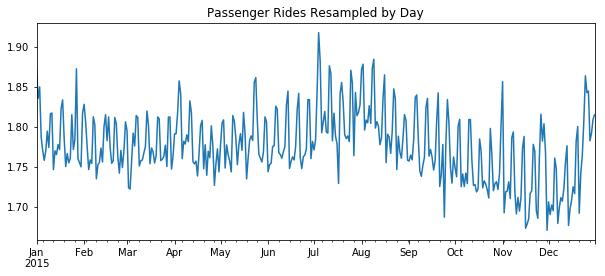

In [9]:
(df.passenger_count
   .resample('1d')
   .var()
   .compute()
   .plot(title='Passenger Rides Resampled by Day', figsize=(10, 4)));

### Tip Fraction, grouped by day-of-week and hour-of-day

In [10]:
df2 = df[(df.tip_amount > 0) & (df.fare_amount > 0)]
df2['tip_fraction'] = df2.tip_amount / df2.fare_amount

# Group df.tpep_pickup_datetime by hour
hour = df2.groupby(df2.index.dt.hour).tip_fraction.mean().persist()

progress(hour)

VBox()

### Plot results

In [11]:
from bokeh.plotting import figure, output_notebook, show
output_notebook()

fig = figure(title='Tip Fraction',
             x_axis_label='Hour of day',
             y_axis_label='Tip Fraction',
             height=300)
fig.line(x=hour.index.compute(), y=hour.compute(), line_width=3)
fig.y_range.start = 0

show(fig)

Loading BokehJS ...